#  EV Car Range Prediction System 

### Problem Statement:

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import joblib

### Dataset Details

#### Loading the Dataset

In [2]:
df = pd.read_csv("EV_cars.csv")

### Explore and Understand the Data

In [3]:
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (360, 9)
   Battery                             Car_name  \
0     75.0  Tesla Model Y Long Range Dual Motor   
1     57.5                        Tesla Model 3   
2     60.5                           BYD ATTO 3   
3     61.7               MG MG4 Electric 64 kWh   
4     75.0  Tesla Model 3 Long Range Dual Motor   

                                       Car_name_link  Efficiency  Fast_charge  \
0  https://ev-database.org/car/1619/Tesla-Model-Y...         172        670.0   
1     https://ev-database.org/car/1991/Tesla-Model-3         137        700.0   
2        https://ev-database.org/car/1782/BYD-ATTO-3         183        370.0   
3  https://ev-database.org/car/1708/MG-MG4-Electr...         171        630.0   
4  https://ev-database.org/car/1992/Tesla-Model-3...         149        780.0   

   Price.DE.  Range  Top_speed  acceleration..0.100.  
0    59017.0    435        217                   5.0  
1    46220.0    420        201                   6.1  
2    44625.0    3

In [4]:
df.size

3240

##### df.info

In [5]:
df.columns

Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')

In [6]:
df.describe()

,Battery,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
count,360.000000,360.000000,358.000000,309.000000,360.000000,360.000000,360.000000
mean,71.187500,195.175000,552.960894,67264.284790,369.694444,180.919444,7.288889
std,20.389849,31.909429,236.864801,34508.249544,107.315514,36.232023,3.005897
min,21.300000,137.000000,170.000000,22550.000000,135.000000,125.000000,2.100000
25%,57.500000,171.000000,360.000000,45690.000000,295.000000,155.750000,4.900000
50%,71.000000,188.000000,520.000000,56942.000000,380.000000,180.000000,6.750000
75%,85.000000,208.250000,680.000000,73100.000000,446.250000,200.000000,9.000000
max,123.000000,295.000000,1290.000000,218000.000000,685.000000,320.000000,19.100000


In [7]:
df.isnull().sum() # checking the null value from the dataset

Battery                  0
Car_name                 0
Car_name_link            0
Efficiency               0
Fast_charge              2
Price.DE.               51
Range                    0
Top_speed                0
acceleration..0.100.     0
dtype: int64

#### Dropped Features:

In [8]:
df = df.drop(columns=["Car_name_link", "Car_name"])

In [9]:
df = df.fillna(df.mean(numeric_only=True)) #fill null values position in mean value

In [26]:
df.to_csv('EV_Car_Range_Prediction_System.csv',index=False)

### Applying Feature Correlation with Heatmap

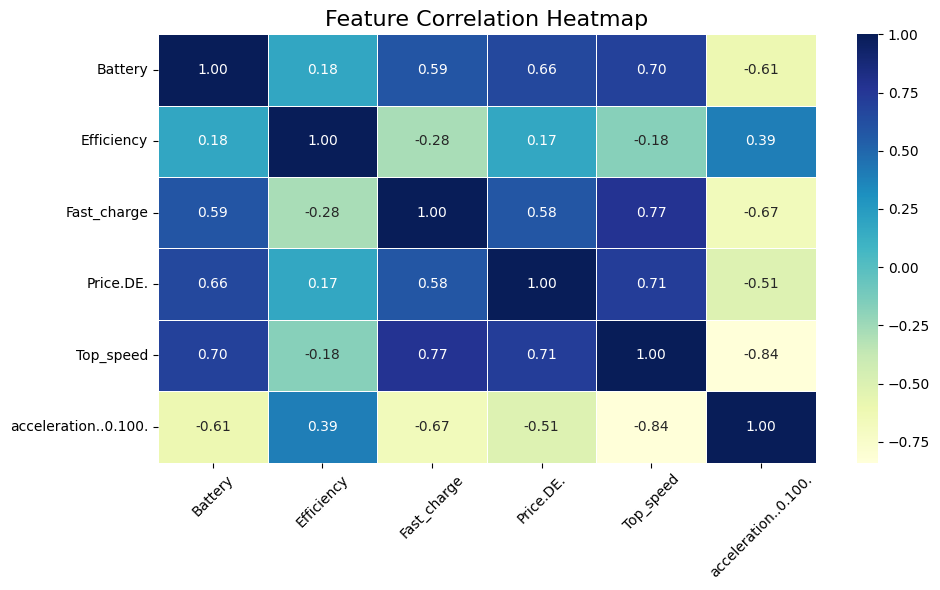

In [10]:
correlation_matrix = df.drop("Range", axis=1).corr(numeric_only=True) # excluding the target column 

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", linewidths=0.5, fmt=".2f")

# Add titles and labels
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Feature Scaling

In [11]:
# Separate features and labels
Y = df["Range"]
X = df.drop(columns=["Range"])

In [12]:
# Initialize the scaler
scaler=StandardScaler()
# Fit the scaler on training data and transform
data_scaled=scaler.fit_transform(df)
scaled_data=pd.DataFrame(data_scaled,columns=df.columns)
# Show sample of scaled data
print("Scaled Features (first 5 rows):")
print(scaled_data.head())

Scaled Features (first 5 rows):
    Battery  Efficiency  Fast_charge  Price.DE.     Range  Top_speed  \
0  0.187241   -0.727285     0.496190  -0.258383  0.609385   0.997205   
1 -0.672224   -1.825666     0.623375  -0.659306  0.469416   0.554993   
2 -0.524887   -0.382080    -0.775666  -0.709277 -0.370400  -0.578178   
3 -0.465953   -0.758668     0.326609  -0.854489 -0.090462  -0.578178   
4  0.187241   -1.449078     0.962537  -0.377341  1.262575   0.554993   

   acceleration..0.100.  
0             -0.762526  
1             -0.396069  
2              0.003702  
3              0.203587  
4             -0.962411  


In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [15]:
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, Y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
scaler.fit(X_train)  # where X_train has 6 features
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [16]:
# Predictions
Y_pred = rf.predict(X_test)

In [17]:
Y_pred

array([321.13333333, 454.68333333, 233.96666667, 204.16666667,
       452.71666667, 383.53333333, 376.41666667, 306.66666667,
       405.61666667, 452.8       , 337.38333333, 185.63333333,
       493.01666667, 259.26666667, 374.21666667, 465.5       ,
       438.45      , 368.05      , 482.53333333, 184.9       ,
       368.56666667, 401.73333333, 427.16666667, 300.05      ,
       258.95      , 205.81666667, 653.38333333, 425.43333333,
       161.65      , 312.8       , 317.3       , 477.4       ,
       185.56666667, 477.45      , 378.75      , 297.25      ,
       564.28333333, 260.38333333, 333.1       , 473.43333333,
       234.86666667, 405.        , 314.26666667, 401.93333333,
       516.3       , 204.41666667, 360.76666667, 393.41666667,
       288.51666667, 204.51666667, 426.53333333, 453.56666667,
       484.55      , 380.05      , 263.73333333, 207.13333333,
       360.11666667, 479.7       , 466.9       , 370.83333333,
       289.78333333, 466.25      , 301.05      , 358.3 

In [18]:
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae:}")
print(f"R-squared: {r2}")

Mean Squared Error: 267.405111882716
Mean Absolute Error: 10.215509259259257
R-squared: 0.9745686816966833


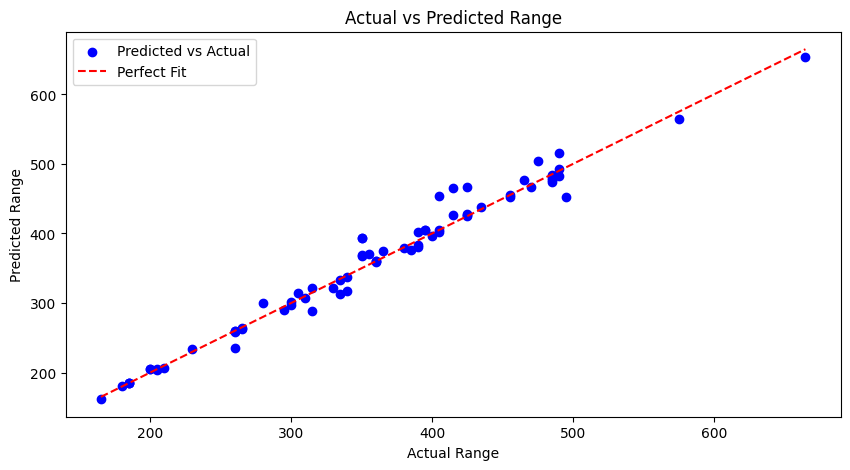

In [19]:
# Scatter plot to compare actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(Y_test, Y_pred, color='blue', label='Predicted vs Actual')
# Diagonal line for perfect predictions
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.title("Actual vs Predicted Range")
plt.legend()
plt.show()

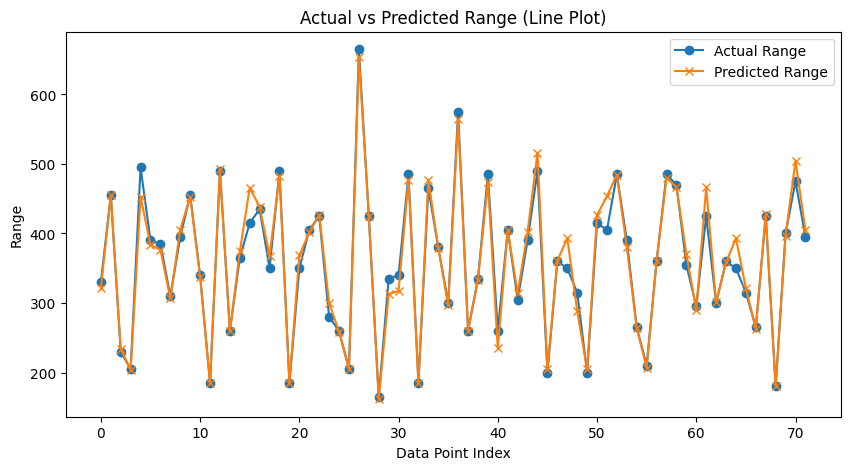

In [20]:
# Line plot to show predictions and actual values
plt.figure(figsize=(10, 5))
plt.plot(range(len(Y_test)), Y_test, label="Actual Range", marker='o')
plt.plot(range(len(Y_test)), Y_pred, label="Predicted Range", marker='x')
plt.xlabel("Data Point Index")
plt.ylabel("Range")
plt.title("Actual vs Predicted Range (Line Plot)")
plt.legend()
plt.show()

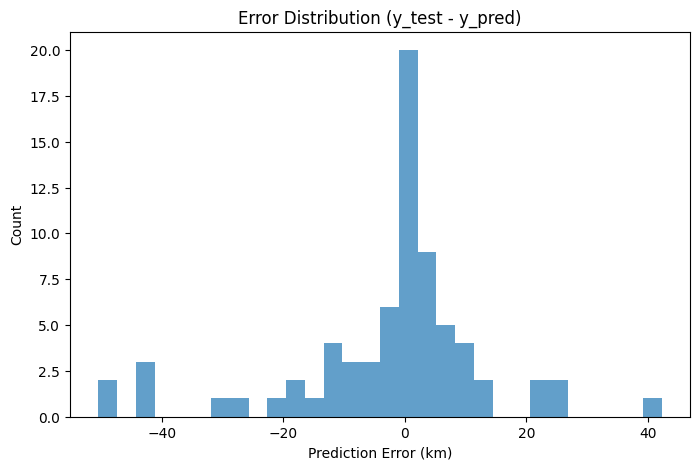

In [21]:
errors = Y_test - Y_pred
plt.figure(figsize=(8,5))
plt.hist(errors, bins=30, alpha=0.7)
plt.title("Error Distribution (y_test - y_pred)")
plt.xlabel("Prediction Error (km)")
plt.ylabel("Count")
plt.show()

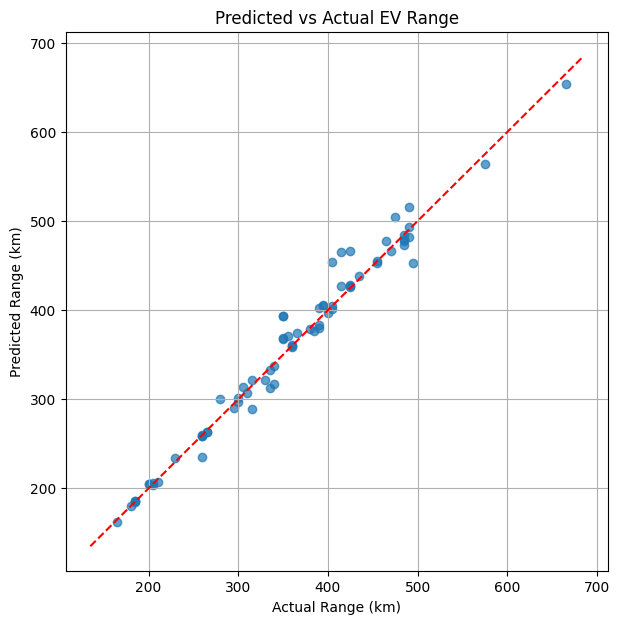

In [22]:
plt.figure(figsize=(7,7))
plt.scatter(Y_test, Y_pred, alpha=0.7)
plt.xlabel("Actual Range (km)")
plt.ylabel("Predicted Range (km)")
plt.title("Predicted vs Actual EV Range")
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--')
plt.grid(True)
plt.show()

In [23]:
joblib.dump(rf, "ev_range_model.pkl")

['ev_range_model.pkl']

In [47]:
import numpy as np
import joblib

# Load saved model and scaler
model = joblib.load("ev_range_model.pkl")
scaler_value = joblib.load("scaler.pkl")
scaler_value
# scaled_data=pd.DataFrame(scaler_value,columns=df.columns)
# Show sample of scaled data
# print("Scaled Features (first 5 rows):")
# print(scaler_value.head())

print("Enter your EV specifications to predict the range:\n")

# Collect user inputs
battery = float(input("Enter Battery Capacity (kWh): "))
efficiency = float(input("Enter Efficiency (Wh/km): "))
fast_charge = float(input("Enter Fast Charge Power (kW): "))
price = float(input("Enter Price (€): "))
top_speed = float(input("Enter Top Speed (km/h): "))
acceleration = float(input("Enter Acceleration (0–100 km/h in seconds): "))

# Combine user input into an array
user_input = np.array([[battery, efficiency, fast_charge, price, top_speed, acceleration]])

# Scale input data
user_scaled = scaler.transform(user_input)

# Predict range
predicted_range = model.predict(user_scaled)[0]

print(f"\n Predicted Range for the given EV: {predicted_range:.2f} km")



Enter your EV specifications to predict the range:



Enter Battery Capacity (kWh):  75
Enter Efficiency (Wh/km):  172
Enter Fast Charge Power (kW):  670
Enter Price (€):  59017
Enter Top Speed (km/h):  217
Enter Acceleration (0–100 km/h in seconds):  5



 Predicted Range for the given EV: 152.60 km


C:\Program Files\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Program Files\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import joblib

# Load the trained model and scaler
model = joblib.load("ev_range_model.pkl")
scaler = joblib.load("scaler.pkl")

print("Enter your EV specifications to predict the range:\n")

# Collect inputs in the SAME order as your X columns
battery = float(input("Enter Battery Capacity (kWh): "))
efficiency = float(input("Enter Efficiency (Wh/km): "))
fast_charge = float(input("Enter Fast Charge Power (kW): "))
price = float(input("Enter Price (€): "))
top_speed = float(input("Enter Top Speed (km/h): "))
acceleration = float(input("Enter Acceleration (0–100 km/h in seconds): "))

# Combine in the exact order of X.columns
user_input = np.array([[battery, efficiency, fast_charge, price, top_speed, acceleration]])

# Scale and predict
user_scaled = scaler.transform(user_input)
predicted_range = model.predict(user_scaled)[0]

print(f"\n Predicted Range for the given EV: {predicted_range:} km")
